In [1]:
import os
import numpy as np
from astropy import units as u 
from astropy.coordinates import SkyCoord
from astropy import coordinates
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy

%matplotlib inline

/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
imagename = "./images/concat_123.ms.self3.substracted.cont.image.fits"

In [22]:
hdu_list = fits.open(imagename)

In [23]:
hdu_list.info()

Filename: ./images/concat_123.ms.self3.substracted.cont.image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1471   (512, 512, 1, 1)   float32   


In [24]:
image_data = hdu_list[0].data
print(type(image_data))
print(image_data.shape)
img = image_data[0][0]

<class 'numpy.ndarray'>
(1, 1, 512, 512)


In [26]:
image_data.max(), image_data.min()

(0.0124909, -8.378614e-05)

INFO: Setting slices=[0, 0] [aplpy.core]


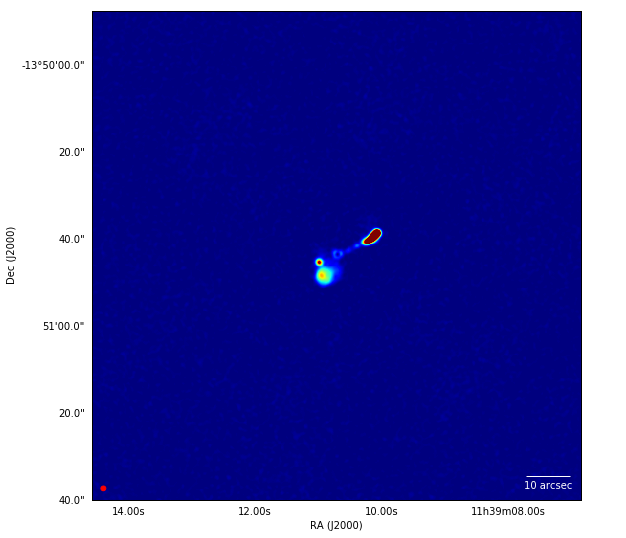

In [7]:
fig = aplpy.FITSFigure(imagename)
fig.add_beam()
fig.beam.set_color('red')
fig.add_scalebar(10 * u.arcsecond)
fig.scalebar.set_label('10 arcsec')
fig.scalebar.set_color("white")
fig.show_colorscale(vmin=0, vmax=0.0025)

In [8]:
from wavelet import wt
wt = wt()

In [9]:
result = wt.atrous(img, 6)

##WT--A Trous--Plane: 6
##WT--A Trous--Plane: 5
##WT--A Trous--Plane: 4
##WT--A Trous--Plane: 3
##WT--A Trous--Plane: 2
##WT--A Trous--Plane: 1
##WT--A Trous--Plane: 0


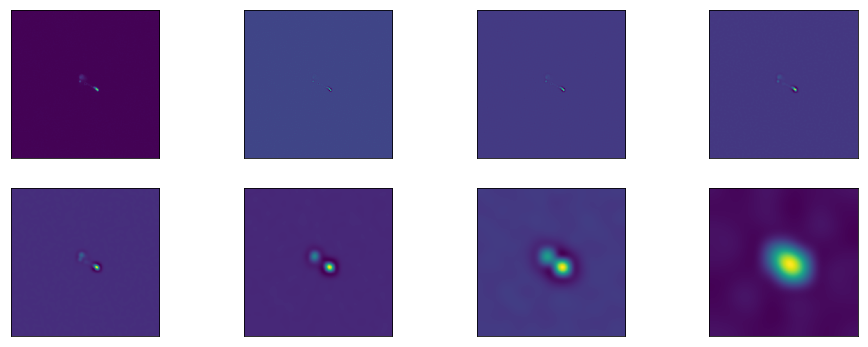

In [10]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
for i,lvl in enumerate(result):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl)
    plt.xticks([]), plt.yticks([])

plt.show()

In [11]:
#filteredplane = wt.filtering(result, threshold=3)#, mask=(192, 320, 192, 320))
filteredplane = wt.filtering(result, waveletNoise=True, imageNoise = 1.92E-05) #waveletNoise=True,

#WT-- Image Filtering
#WT-- Filtering to be checked
##WT--Plane 6 Sigma = 1.727380e-05
##WT--Pixel filtered : 261710
##WT--Plane 5 Sigma = 3.955469e-06
##WT--Pixel filtered : 217772
##WT--Plane 4 Sigma = 1.697428e-06
##WT--Pixel filtered : 163567
##WT--Plane 3 Sigma = 8.376922e-07
##WT--Pixel filtered : 170936
##WT--Plane 2 Sigma = 4.461062e-07
##WT--Pixel filtered : 153957
##WT--Plane 1 Sigma = 2.687194e-07
##WT--Pixel filtered : 105141


/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


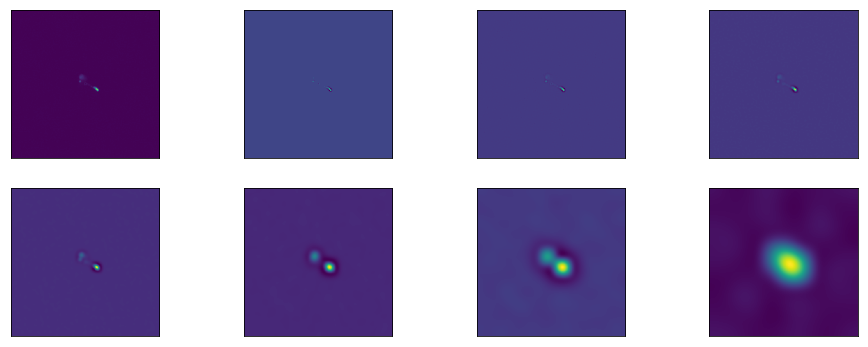

In [12]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
for i,lvl in enumerate(filteredplane):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl)
    plt.xticks([]), plt.yticks([])

plt.show()

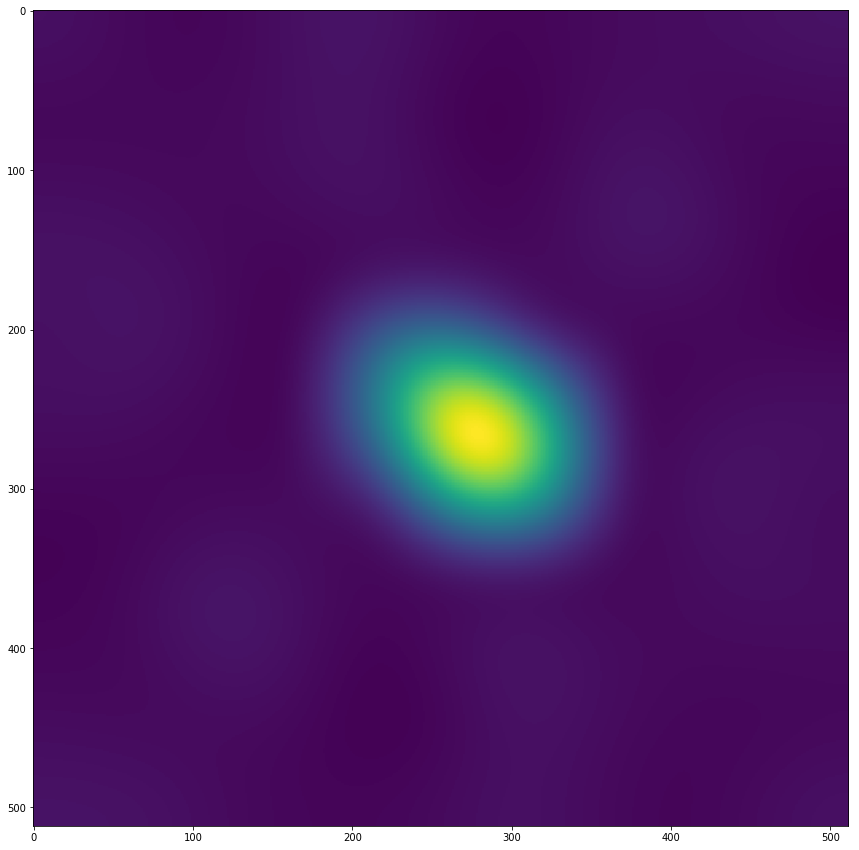

In [13]:
plt.figure(figsize=(15,15))
plt.imshow(filteredplane[6])

In [14]:
filtered = wt.restore(filteredplane, 0, 6)

##WT--Restore-plane: 0 to 6
##WT--Restore-plane: 0
##WT--Restore-plane: 1
##WT--Restore-plane: 2
##WT--Restore-plane: 3
##WT--Restore-plane: 4
##WT--Restore-plane: 5
##WT--Restore-plane: 6


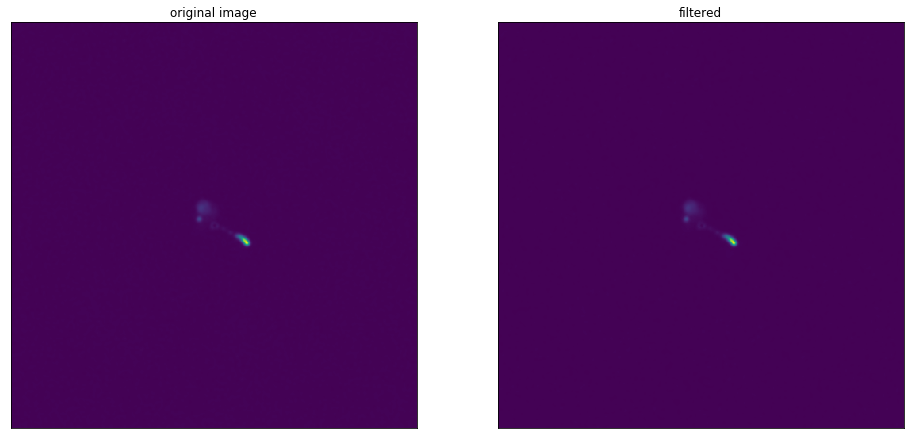

In [15]:
plt.figure(figsize=(16,12))

plt.subplot(121)
plt.imshow(img)
plt.title("original image")
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title("filtered")
plt.imshow(filtered)
plt.xticks([]), plt.yticks([])

plt.show()

In [16]:
hdu_list[0].data[0][0] = filtered

In [17]:
outputname = 'filtered.fits'

if os.path.exists(outputname):
    os.remove(outputname)

hdu_list.writeto(outputname)

INFO: Setting slices=[0, 0] [aplpy.core]


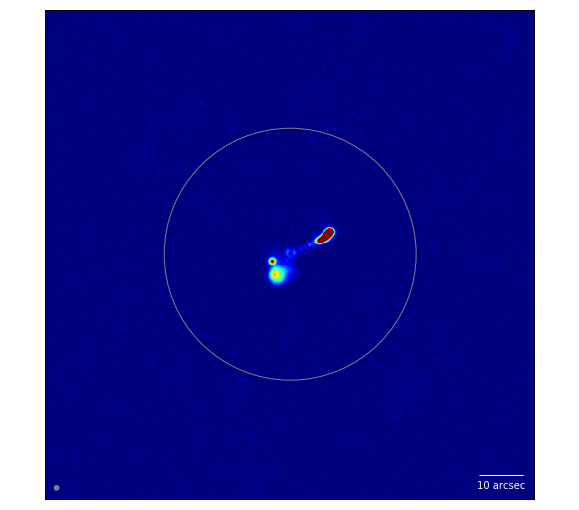

In [18]:
rms = 1.92046941265e-05
c = SkyCoord('11h39m10.702595s -13d50m43.63856s', unit=(u.hourangle, u.deg), frame='icrs')
center_x, center_y = [c.ra.value, c.dec.value]

PB = 58./3600.0 

multp = np.array([4, 10, 50, 100, 500, 1000])
lvl = rms*multp


image = aplpy.FITSFigure(outputname)
#image.tick_labels.set_font(size='small')
#image.show_contour(colors='white', levels=lvl, alpha=0.75)
image.hide_xaxis_label()
image.hide_yaxis_label()
image.hide_tick_labels()

image.add_beam()
image.beam.set_color('gray')
image.add_scalebar(10 * u.arcsecond)
image.scalebar.set_label('10 arcsec')
image.scalebar.set_color("white")

# marker_size =  100
# image.show_markers(ra, dec, edgecolor='red', facecolor='none', marker='o', s=marker_size, alpha=0.4)

# primary beam circle
image.show_circles(center_x, center_y, PB/2.0, edgecolor='gray')

image.show_colorscale(vmin=0, vmax=0.0025)

In [27]:
image.savefig("filtered.png", dpi=300)

In [19]:
hdu_list = fits.open("filtered.fits")
image_data = hdu_list[0].data
image_data.max()

0.0124909

In [20]:
image_data.max()

0.0124909

In [21]:
image_data.min()

-6.4693486e-05